In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from pylab import rcParams
rcParams['figure.figsize']=20,8
plt.style.use('ggplot')

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
#removing the data
y=df['diagnosis']
y = y.replace({'M':0,'B':1})

df.drop(['id','Unnamed: 32','diagnosis'],axis=1,inplace=True)
x=df

In [6]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0, stratify=y)

In [7]:
print(y_train.value_counts())
print(y_test.value_counts())

1    285
0    170
Name: diagnosis, dtype: int64
1    72
0    42
Name: diagnosis, dtype: int64


# GridSearchCV

In [8]:
%%time
from sklearn.model_selection import GridSearchCV

# define parameters
nEstimator = [10,11,12,13,14,15,16]
depth = [5,10,20,30,40,50,60]
criterion=['entropy', 'gini']
min_samples_leaf=[1, 2, 5, 10]
min_samples_split=[2, 5, 10, 15]
max_features = ['auto', 'sqrt','log2']

RF = RandomForestClassifier()
hyperParam = [{'n_estimators':nEstimator,
               'max_depth': depth,
               'criterion':criterion,
               'max_features': max_features,
               'min_samples_leaf':min_samples_leaf,
               'min_samples_split':min_samples_split}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
gsv.fit(x_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)

Fitting 5 folds for each of 4704 candidates, totalling 23520 fits
Best HyperParameter:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 13}
0.9780069972619346
CPU times: user 41.3 s, sys: 1.44 s, total: 42.7 s
Wall time: 3min 55s


Accuracy on test set: 93.86%
F1-Score on test set: 0.95
-------------------- confusion matrix --------------------


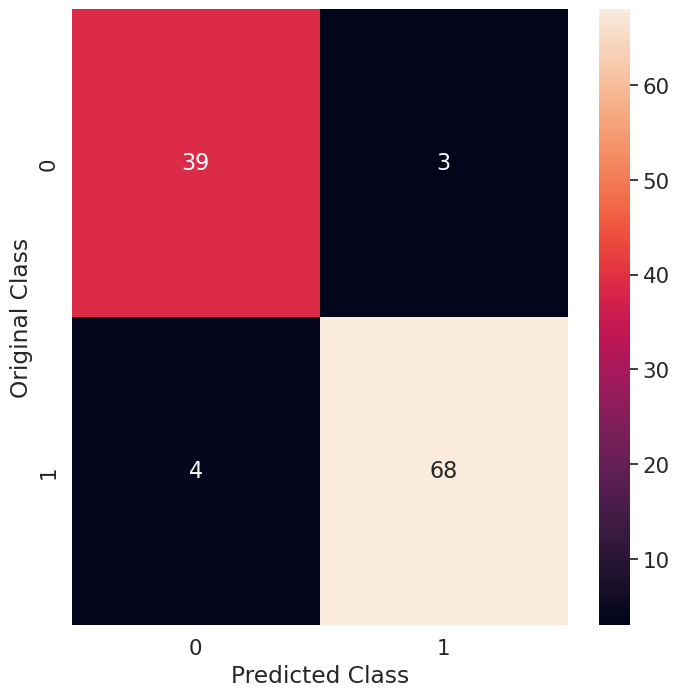

In [9]:
y_pred=gsv.predict(x_test)
print("Accuracy on test set: %0.2f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.2f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# RandomizedSearchCV

In [10]:
%%time
from sklearn.model_selection import RandomizedSearchCV

RF = RandomForestClassifier()
hyperParam = {'n_estimators':nEstimator,
               'max_depth': depth,
               'criterion':criterion,
               'max_features': max_features,
               'min_samples_leaf':min_samples_leaf,
               'min_samples_split':min_samples_split}
rsv = RandomizedSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
rsv.fit(x_train,y_train)
print("Best HyperParameter: ",rsv.best_params_)
print(rsv.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best HyperParameter:  {'n_estimators': 15, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'criterion': 'entropy'}
0.9646956008181368
CPU times: user 173 ms, sys: 4.11 ms, total: 177 ms
Wall time: 590 ms


Accuracy on test set: 95.61%
F1-Score on test set: 0.97
-------------------- confusion matrix --------------------


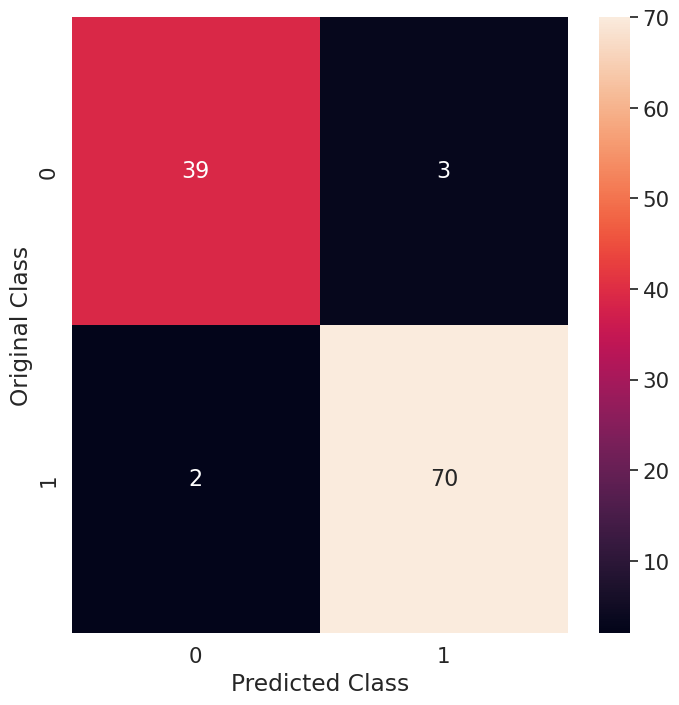

In [11]:
y_pred=rsv.predict(x_test)
print("Accuracy on test set: %0.2f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.2f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# Bayesian Optimization

In [12]:
%%time
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

space = {
    "n_estimators" : hp.choice('n_estimators',[10,11,12,13,14,15,16]),
        "max_depth" : hp.choice('max_depth',[5,10,20,30,40,50,60]),
        "criterion" : hp.choice("criterion",['entropy', 'gini']),
        "min_samples_leaf" : hp.choice("min_samples_leaf",[1, 2, 5, 10]),
        "min_samples_split" : hp.choice("min_samples_split",[2, 5, 10, 15]),
        "max_features" : hp.choice("max_features",['auto', 'sqrt','log2'])
    }

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], 
                                   max_depth = space['max_depth'],
                                   min_samples_leaf = space['min_samples_leaf'],
                                   min_samples_split = space['min_samples_split'],
                                   n_estimators = space['n_estimators'], 
                                   )
    
    accuracy = cross_val_score(model, x_train, y_train, cv =4).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 20,
            trials= trials)
best

100%|██████████| 20/20 [00:02<00:00,  9.78trial/s, best loss: -0.9604680950163018]
CPU times: user 2.58 s, sys: 135 ms, total: 2.71 s
Wall time: 2.99 s


{'criterion': 1,
 'max_depth': 1,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 1,
 'n_estimators': 5}

In [13]:
criterion = {0: 'entropy', 
             1: 'gini'}
estimator = {0: '10', 
             1: '11', 
             2: '12', 
             3: '13', 
             4: '14',
             5:'15',
             6:'16'}
max_depth={0:5,
           1:10,
           2:20,
           3:30,
           4:40,
           5:50,
           6:60}
min_samples_leaf={0:1, 
                  1:2, 
                  2:5, 
                  3:10}
min_samples_split={0:2, 
                   1:5, 
                   2:10, 
                   3:15}
max_features={0:'auto', 
              1:'sqrt',
              2:'log2'}

In [14]:
print("criterion",criterion[best['criterion']])
print("n_estimators",estimator[best['n_estimators']])
print("max_depth",max_depth[best['max_depth']])
print("min_samples_leaf",min_samples_leaf[best['min_samples_leaf']])
print("min_samples_split",min_samples_split[best['min_samples_split']])
print("max_features",max_features[best['max_features']])

criterion gini
n_estimators 15
max_depth 10
min_samples_leaf 2
min_samples_split 5
max_features sqrt


In [15]:
random_forest = RandomForestClassifier(criterion ='entropy',
                                       n_estimators = 15,
                                       max_depth = 60, 
                                       min_samples_leaf =1 , 
                                       min_samples_split =5,
                                       max_features='auto'
                                       )
random_forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=60, min_samples_split=5,
                       n_estimators=15)

Accuracy on test set: 93.860%
F1-Score on test set: 0.950
-------------------- confusion matrix --------------------


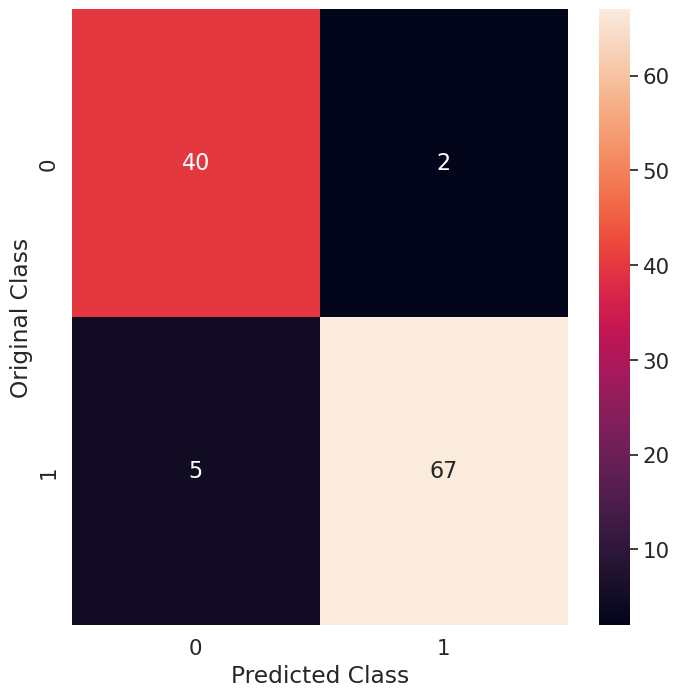

In [16]:
y_pred=random_forest.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# Genetic Algorithm

In [17]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [10,11,12,13,14,15,16]
max_depth = [5,10,20,30,40,50,60]
criterion=['entropy', 'gini']
min_samples_leaf=[1, 2, 5, 10]
min_samples_split=[2, 5, 10, 15]
max_features = ['auto', 'sqrt','log2']


param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

In [18]:
%%time
from tpot import TPOTClassifier

tpot_classifier = TPOTClassifier(generations= 5, 
                                 population_size= 24, 
                                 offspring_size= 12,
                                 verbosity= 2, 
                                 early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, 
                                 scoring = 'accuracy')
tpot_classifier.fit(x_train,y_train)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9692012109920819

Generation 2 - Current best internal CV score: 0.9692012109920819

Generation 3 - Current best internal CV score: 0.9692012109920819

Generation 4 - Current best internal CV score: 0.9692012109920819

Generation 5 - Current best internal CV score: 0.9692012109920819

Best pipeline: RandomForestClassifier(RandomForestClassifier(input_matrix, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=12), criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12)
CPU times: user 14 s, sys: 389 ms, total: 14.4 s
Wall time: 15.7 s


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [5,
                                                                                      10,
                                                                                      20,
                                                                                      30,
                                                                                      40,
                                                                                      50,
                                                                                      60],
                                                                        'max_features': ['auto',
                                                                                 

Accuracy on test set: 92.98%
F1-Score on test set: 0.94
-------------------- confusion matrix --------------------


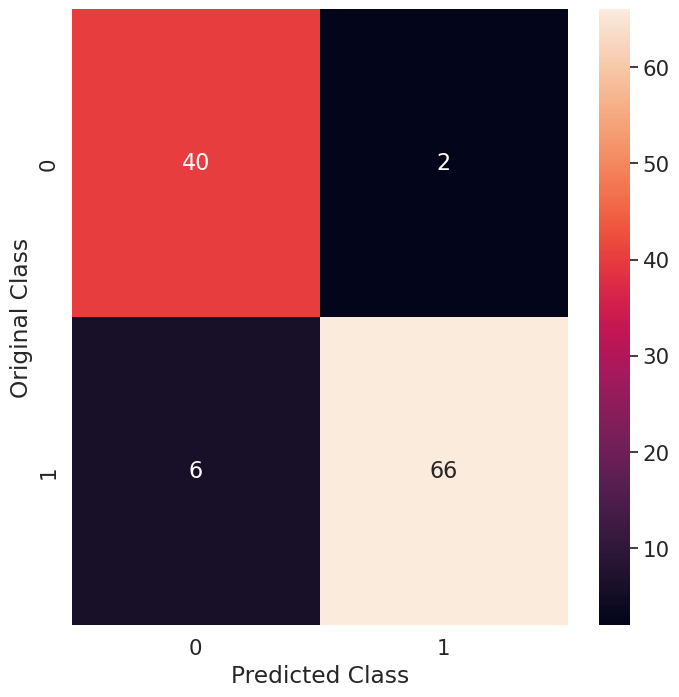

In [19]:
y_pred=tpot_classifier.predict(x_test)
print("Accuracy on test set: %0.2f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.2f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# Optuna

In [20]:
import optuna
import sklearn.svm

def objective(trial):

    classifier = 'RandomForest'
    
    n_estimators = trial.suggest_int('n_estimators', 10, 17,1)
    max_depth = int(trial.suggest_categorical('max_depth', [5,10,20,30,40,50,60]))
    criterion = trial.suggest_categorical('criterion', ['entropy', 'gini'])
    min_samples_leaf = int(trial.suggest_categorical('min_samples_leaf',[1, 2, 5, 10]))
    min_samples_split = int(trial.suggest_categorical('min_samples_split', [2, 5, 10, 15]))
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])

    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, 
                                                  max_depth=max_depth,
                                                  criterion=criterion,
                                                  min_samples_leaf=min_samples_leaf,
                                                  min_samples_split=min_samples_split,
                                                  max_features=max_features
                                                 )

    return sklearn.model_selection.cross_val_score(clf,x_train,y_train, n_jobs=-1, cv=3).mean()

In [21]:
%%time
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2023-03-14 19:29:57,880] A new study created in memory with name: no-name-d3fe5caf-c02b-4f1e-acdd-a5132aada30b
[I 2023-03-14 19:29:57,935] Trial 0 finished with value: 0.9582461949575927 and parameters: {'n_estimators': 14, 'max_depth': 50, 'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9582461949575927.
[I 2023-03-14 19:29:57,993] Trial 1 finished with value: 0.9494306959451609 and parameters: {'n_estimators': 16, 'max_depth': 50, 'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 15, 'max_features': 'auto'}. Best is trial 0 with value: 0.9582461949575927.
[I 2023-03-14 19:29:58,047] Trial 2 finished with value: 0.9516527245265481 and parameters: {'n_estimators': 16, 'max_depth': 60, 'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 5, 'max_features': 'auto'}. Best is trial 0 with value: 0.9582461949575927.
[I 2023-03-14 19:29:58,100] Trial 3 finished with value: 0.951

Accuracy: 0.9736115952131986
Best hyperparameters: {'n_estimators': 15, 'max_depth': 30, 'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 2, 'max_features': 'sqrt'}
CPU times: user 2.61 s, sys: 108 ms, total: 2.71 s
Wall time: 6.84 s


In [22]:
study.best_params

{'n_estimators': 15,
 'max_depth': 30,
 'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'max_features': 'sqrt'}

In [23]:
rf=RandomForestClassifier(n_estimators= 10,
                         max_depth= 30,
                         criterion= 'entropy',
                         min_samples_leaf= 2,
                         min_samples_split= 2,
                         max_features= 'log2')
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       min_samples_leaf=2, n_estimators=10)

Accuracy on test set: 94.74%
F1-Score on test set: 0.96
-------------------- confusion matrix --------------------


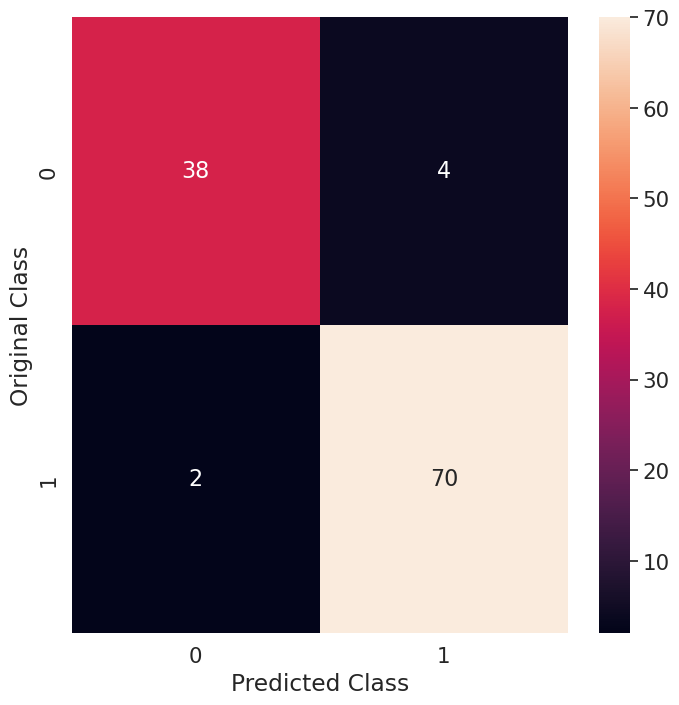

In [24]:
y_pred=rf.predict(x_test)
print("Accuracy on test set: %0.2f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.2f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()
